In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import arch
from arch import arch_model
import data_reader as dr

In [11]:
data, source = dr.read('kospi_extended.csv')

Loading data from file /home/changhyun/workspace/cxk858/dataset/kospi_extended.csv...



In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 0 to 2461
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2456 non-null   object 
 1   Open                 2456 non-null   float64
 2   High                 2456 non-null   float64
 3   Low                  2456 non-null   float64
 4   Close                2456 non-null   float64
 5   Adj Close            2456 non-null   float64
 6   Volume               2456 non-null   float64
 7   Daily_trading_range  2456 non-null   float64
 8   Log_Volume_change    2455 non-null   float64
 9   Daily_return         2455 non-null   float64
 10  Daily_log_return     2455 non-null   float64
 11  Target               2434 non-null   float64
dtypes: float64(11), object(1)
memory usage: 249.4+ KB


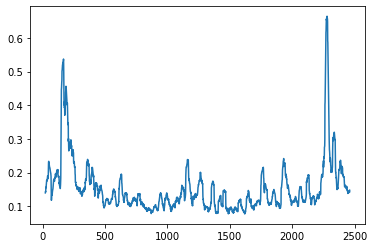

In [13]:
plt.plot(data['Target'])
plt.show()

In [14]:
logreturns = data[['Daily_log_return']]
logreturns = logreturns.dropna()
logreturns

,Daily_log_return
1,0.007249
2,-0.001243
3,-0.002375
4,0.004126
5,-0.002587
...,...
2457,0.009517
2458,0.016901
2459,0.000620
2460,0.004232


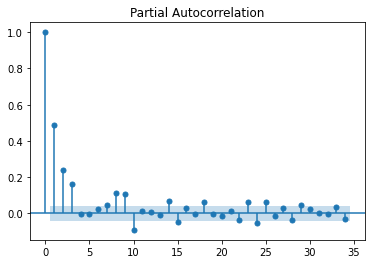

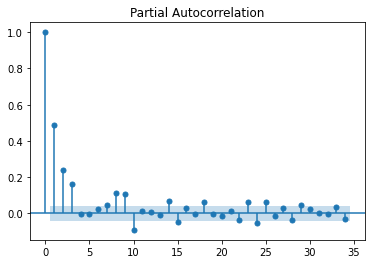

In [15]:
plot_pacf(logreturns**2)

In [16]:
model = arch_model(logreturns*100, p=1, q=1)

In [17]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 251495.80252456426
Iteration:      2,   Func. Count:     15,   Neg. LLF: 135453701121.83444
Iteration:      3,   Func. Count:     23,   Neg. LLF: 4184.8189301661605
Iteration:      4,   Func. Count:     30,   Neg. LLF: 644685848.9824195
Iteration:      5,   Func. Count:     36,   Neg. LLF: 3199.1556810582883
Iteration:      6,   Func. Count:     42,   Neg. LLF: 3189.9345572244792
Iteration:      7,   Func. Count:     47,   Neg. LLF: 3189.933484749543
Iteration:      8,   Func. Count:     52,   Neg. LLF: 3189.933441365098
Iteration:      9,   Func. Count:     56,   Neg. LLF: 3189.933441365245
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3189.933441365098
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9


In [18]:
# model_fit.summary()
int

int

In [19]:
rolling_predictions = []
testSize = int(len(logreturns)*0.2)

for i in range(testSize):
    train = logreturns[:-(testSize-i)]*100
    model = arch_model(train,p=1,q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0])*0.01*np.sqrt(252))

In [20]:
rolling_predictions = pd.Series(rolling_predictions, index=logreturns.index[-testSize:])

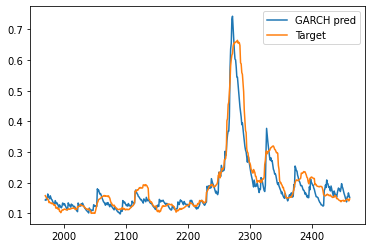

In [32]:
plt.plot(rolling_predictions, label='GARCH pred')
plt.plot(data['Target'][len(data['Target'])-testSize:], label='Target')
plt.legend()
plt.savefig("images/garch(1,1).png")
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [30]:
testScore = mean_squared_error(rolling_predictions, data['Target'][len(data['Target'])-testSize:])
print("test Score: {score} MSE".format(score=testScore))
root_testScore = mean_squared_error(rolling_predictions, data['Target'][len(data['Target'])-testSize:], squared=False)
print("test Score: {score} RMSE".format(score=root_testScore))
mape = mean_absolute_percentage_error(rolling_predictions, data['Target'][len(data['Target'])-testSize:])
print("test Score: {score} MAPE".format(score=mape))

test Score: 0.0015112377870347112 MSE
test Score: 0.038874641953781534 RMSE
test Score: 0.12918519370117815 MAPE
